<a href="https://colab.research.google.com/github/uditsaini1111/Credit-Risk-Ptediction/blob/main/project__creditrisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df=pd.read_csv('/content/german_credit_data.csv')

In [173]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [175]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [176]:
df1=df.copy()

In [177]:
df1

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [178]:
df1['Saving accounts'] = df1['Saving accounts'].fillna('unknown')
df1['Checking account'] = df1['Checking account'].fillna('unknown')

In [179]:
df1.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


In [180]:
df1=df1.drop('Unnamed: 0',axis=1)

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [182]:
df1.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [183]:
def target(row):
    f = 0

    if (row['Credit amount']>5000) & (row['Credit amount']<=8000):
        f += 1
    elif row['Credit amount']>8000:
        f += 2

    if row['Duration']>45:
      f+=1

    if row['Job'] <= 1:
      f+=1

    if (row['Age']<=22) & (row['Age']>=65):
      f+=1

    if row['Housing']=='rent':
        f+=1

    if row['Saving accounts'] in ['little', 'unknown']:
      f+=2
    elif row['Saving accounts'] in ['moderate']:
      f+=1

    if row['Checking account'] in ['little', 'unknown']:
      f+=1

    return 1 if f >=2 else 0


In [184]:
df1['Risk']=df1.apply(target,axis=1)

In [185]:
df1['Risk'].value_counts()

,count
Risk,
1,905
0,95


In [186]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in ['Sex', 'Housing',	'Saving accounts', 'Checking account', 'Purpose']:
  df1[i]=LE.fit_transform(df1[i])
  print(f"\nColumn: {i}")
  for cls, code in zip(LE.classes_, range(len(LE.classes_))):
    print(f"{cls} | {code}")


Column: Sex
female | 0
male | 1

Column: Housing
free | 0
own | 1
rent | 2

Column: Saving accounts
little | 0
moderate | 1
quite rich | 2
rich | 3
unknown | 4

Column: Checking account
little | 0
moderate | 1
rich | 2
unknown | 3

Column: Purpose
business | 0
car | 1
domestic appliances | 2
education | 3
furniture/equipment | 4
radio/TV | 5
repairs | 6
vacation/others | 7


In [187]:
df1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,1
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,3,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,1


In [188]:
a = df1.corr()
a = a[(a>0.8) & (a!=1)]
a

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purpose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

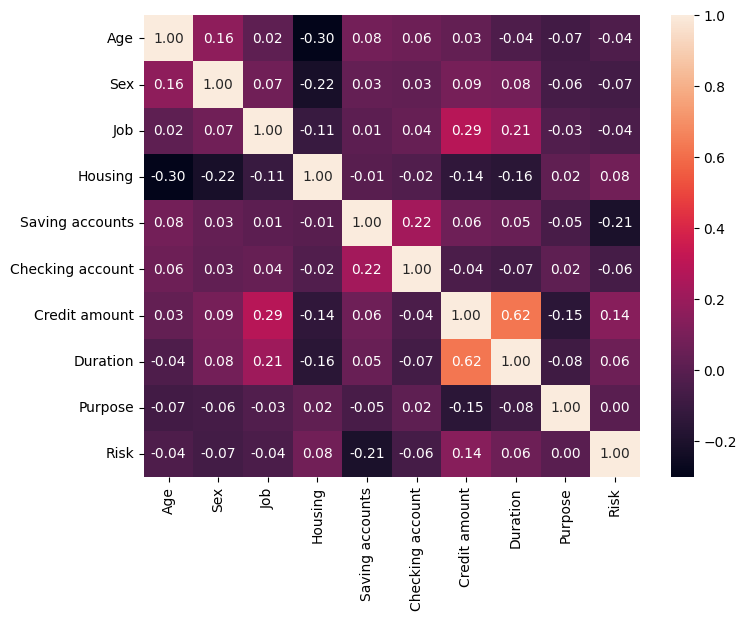

In [189]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot = True, fmt='.2f')

In [190]:
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

<Axes: >

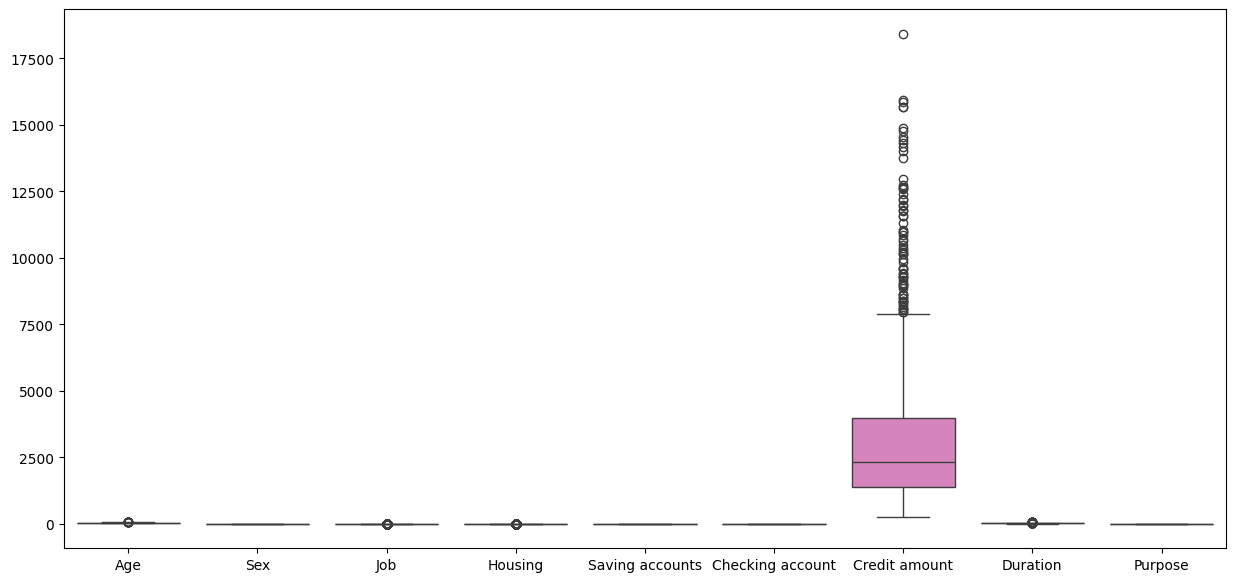

In [191]:
plt.figure(figsize=(15,7))
sns.boxplot(data=x)

/tmp/ipython-input-967136505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Credit amount'])


<Axes: xlabel='Credit amount', ylabel='Density'>

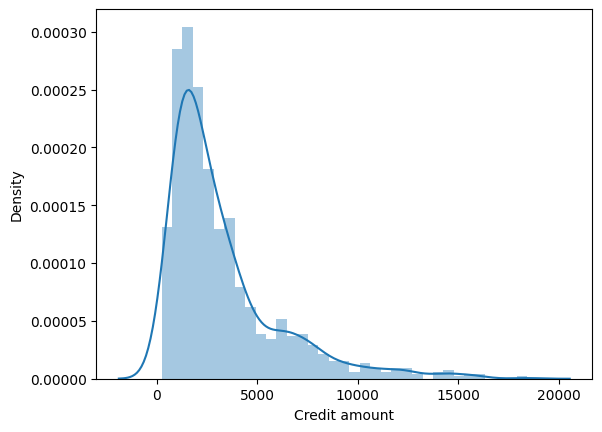

In [192]:
sns.distplot(df1['Credit amount'])

In [193]:
x_1=x[(x['Credit amount'])<(x['Credit amount'].quantile(.95))]
y_1=y[(x['Credit amount'])<(x['Credit amount'].quantile(.95))]

<Axes: >

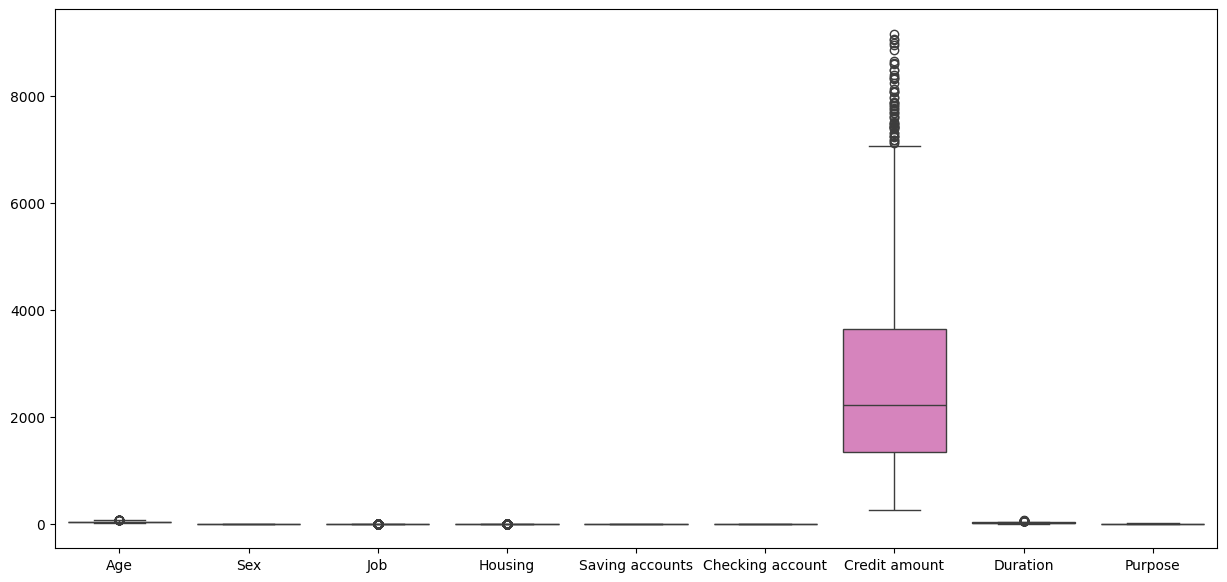

In [194]:
plt.figure(figsize=(15,7))
sns.boxplot(data=x_1)

/tmp/ipython-input-3044474230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_1['Credit amount'])


<Axes: xlabel='Credit amount', ylabel='Density'>

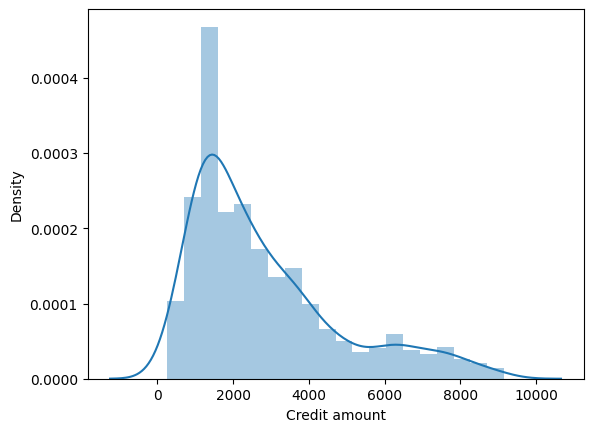

In [195]:
sns.distplot(x_1['Credit amount'])

In [196]:
x_1.shape

(950, 9)

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x_1)
x_2=pd.DataFrame(x_scale, columns=x_1.columns)

In [198]:
x_2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.772942,0.677712,0.183815,-0.161197,1.843462,-1.253614,-0.832290,-1.248199,1.069551
1,-1.188933,-1.475553,0.183815,-0.161197,-0.698322,-0.461243,1.591770,2.521339,1.069551
2,1.188192,0.677712,-1.375331,-0.161197,-0.698322,1.123499,-0.362381,-0.709694,0.046830
3,0.836025,0.677712,0.183815,-2.075415,-0.698322,-1.253614,2.570620,1.982834,0.558190
4,1.540359,0.677712,0.183815,-2.075415,-0.698322,-1.253614,1.043797,0.367317,-0.975891
...,...,...,...,...,...,...,...,...,...
945,-0.396558,-1.475553,-1.375331,-0.161197,-0.698322,1.123499,-0.544870,-0.709694,0.558190
946,0.395817,0.677712,1.742961,-0.161197,-0.698322,-1.253614,0.530293,0.905823,-0.975891
947,0.219734,0.677712,0.183815,-0.161197,-0.698322,1.123499,-1.017313,-0.709694,1.069551
948,-1.100892,0.677712,0.183815,-2.075415,-0.698322,-1.253614,-0.489616,2.252087,1.069551


<Axes: >

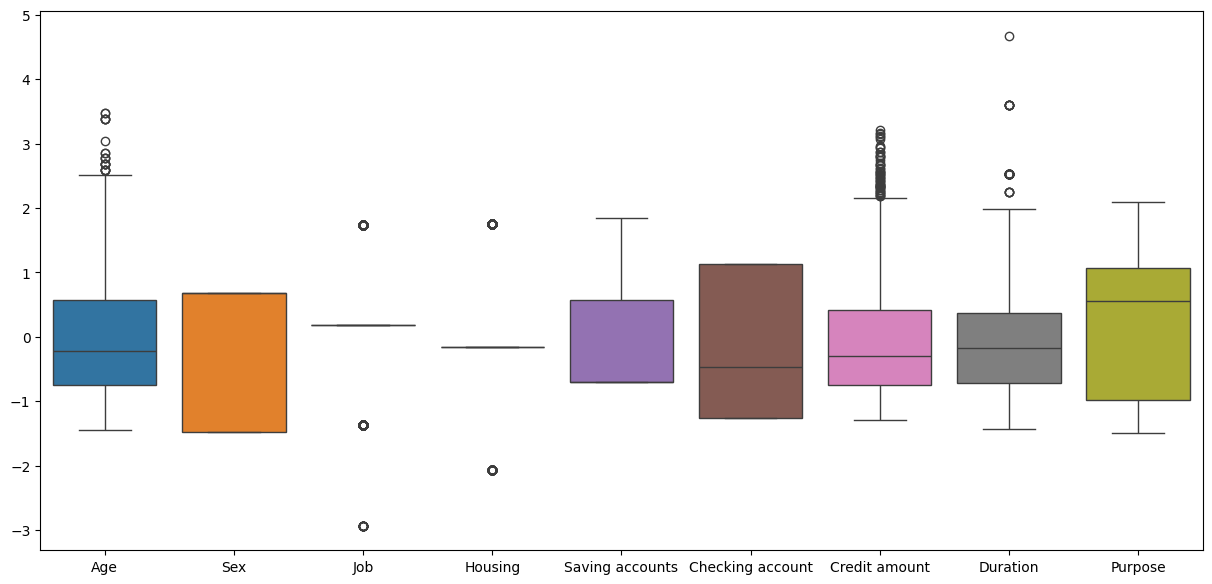

In [199]:
plt.figure(figsize=(15,7))
sns.boxplot(data=x_2)

In [200]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_2, y_1, test_size=0.3, random_state=42)

In [201]:
y_train.value_counts()

,count
Risk,
1,594
0,71


In [202]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_1, y_train_1 = smote.fit_resample(x_train, y_train)

In [203]:
y_train_1.value_counts()

,count
Risk,
0,594
1,594


In [204]:
from sklearn.linear_model import LogisticRegression
m1= LogisticRegression()
m1.fit(x_train_1,y_train_1)

LogisticRegression()

In [205]:
p1=m1.predict(x_test)

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p1))

              precision    recall  f1-score   support

           0       0.25      0.88      0.39        24
           1       0.99      0.76      0.86       261

    accuracy                           0.77       285
   macro avg       0.62      0.82      0.62       285
weighted avg       0.92      0.77      0.82       285



In [207]:
from xgboost import XGBClassifier
m2= XGBClassifier()
m2.fit(x_train_1, y_train_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [208]:
p2=m1.predict(x_test)

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p1))

              precision    recall  f1-score   support

           0       0.25      0.88      0.39        24
           1       0.99      0.76      0.86       261

    accuracy                           0.77       285
   macro avg       0.62      0.82      0.62       285
weighted avg       0.92      0.77      0.82       285



In [210]:
import pickle
pickle.dump(m2, open("CreditRisk_prediction.pkl", "wb"))

In [211]:
m2.feature_importances_

array([0.01349573, 0.01490763, 0.08778127, 0.13735056, 0.6233208 ,
       0.07030692, 0.0445928 , 0.00467745, 0.00356684], dtype=float32)

In [212]:
abs(m1.coef_[0])

array([0.1379467 , 0.49343368, 0.58626875, 0.52081579, 1.21837324,
       0.06285802, 1.3605674 , 0.36339373, 0.13089058])

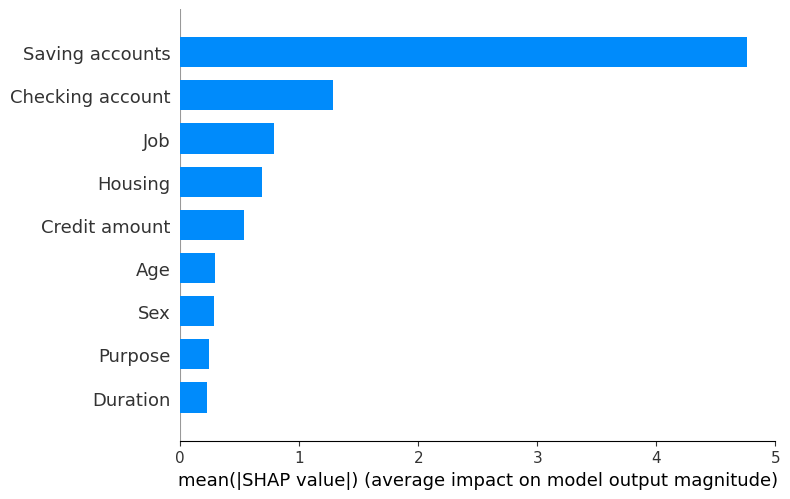

In [213]:
import shap

explainer = shap.TreeExplainer(m2)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type='bar')

In [214]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,       # base value (average prediction)
    shap_values[0],             # SHAP values for this row
    x_test.iloc[0]               # feature values for this row
)